In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load data
data = pd.read_csv('Google_Stock_Price_Train.csv', thousands=',')
print(data.head())



       Date    Open    High     Low   Close    Volume
0  1/3/2012  325.25  332.83  324.97  663.59   7380500
1  1/4/2012  331.27  333.87  329.08  666.45   5749400
2  1/5/2012  329.83  330.75  326.89  657.21   6590300
3  1/6/2012  328.34  328.77  323.68  648.24   5405900
4  1/9/2012  322.04  322.29  309.46  620.76  11688800


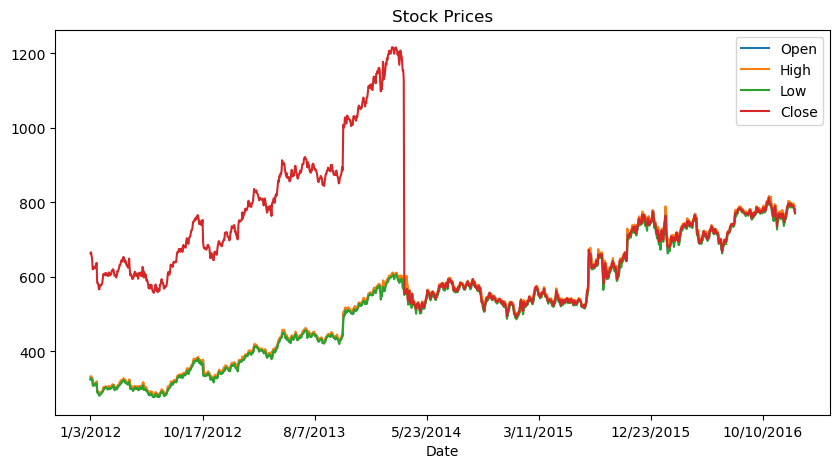

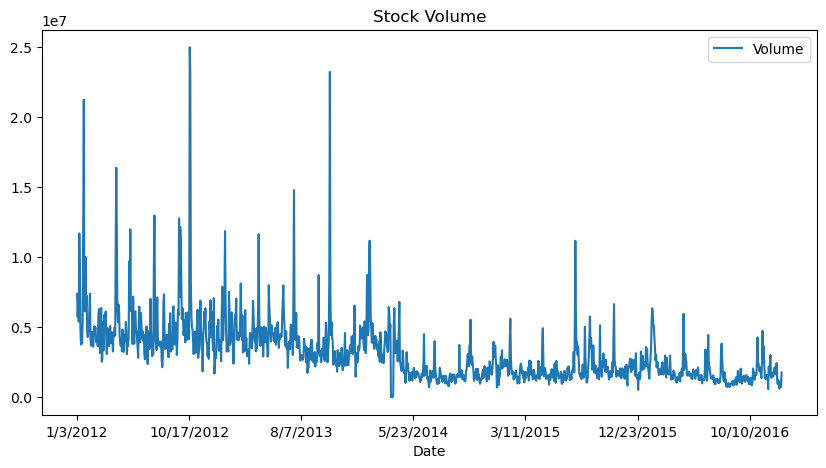

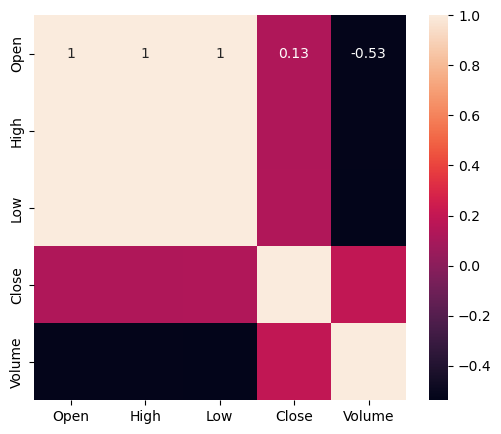

In [2]:
# Price & Volume trends
data.plot(x="Date", y=["Open", "High", "Low", "Close"], figsize=(10,5), title='Stock Prices')
plt.show()

data.plot(x="Date", y=["Volume"], figsize=(10,5), title='Stock Volume')
plt.show()

# Correlation heatmap
plt.figure(figsize=(6,5))
sns.heatmap(data.drop("Date", axis=1).corr(), annot=True)
plt.show()


In [8]:
# Scale features
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data.drop("Date", axis=1))

scaled_data = scaled_data  # keep Open, High, Low, Close, Volume

# Sequence split function
def split_seq(seq, n_past):
    x, y = [], []
    for i in range(len(seq) - n_past):
        x.append(seq[i:i+n_past])
        y.append(seq[i+n_past, -1])  # Volume
    return np.array(x), np.array(y)

# Prepare sequences
n_steps = 60
x, y = split_seq(scaled_data, n_steps)

# Train-Test Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [10]:
model = Sequential([
    LSTM(612, input_shape=(n_steps, 5)),
    Dense(50, activation='relu'),
    Dense(50, activation='relu'),
    Dense(30, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test))


Epoch 1/50
30/30 [==============================] - 10s 272ms/step - loss: 0.0086 - mae: 0.0567 - val_loss: 0.0061 - val_mae: 0.0408
Epoch 2/50
30/30 [==============================] - 7s 249ms/step - loss: 0.0047 - mae: 0.0386 - val_loss: 0.0056 - val_mae: 0.0518
Epoch 3/50
30/30 [==============================] - 8s 268ms/step - loss: 0.0048 - mae: 0.0395 - val_loss: 0.0052 - val_mae: 0.0448
Epoch 4/50
30/30 [==============================] - 10s 340ms/step - loss: 0.0046 - mae: 0.0388 - val_loss: 0.0051 - val_mae: 0.0433
Epoch 5/50
30/30 [==============================] - 10s 346ms/step - loss: 0.0046 - mae: 0.0373 - val_loss: 0.0050 - val_mae: 0.0400
Epoch 6/50
30/30 [==============================] - 9s 307ms/step - loss: 0.0044 - mae: 0.0363 - val_loss: 0.0050 - val_mae: 0.0427
Epoch 7/50
30/30 [==============================] - 10s 322ms/step - loss: 0.0043 - mae: 0.0376 - val_loss: 0.0049 - val_mae: 0.0452
Epoch 8/50
30/30 [==============================] - 9s 303ms/step - loss

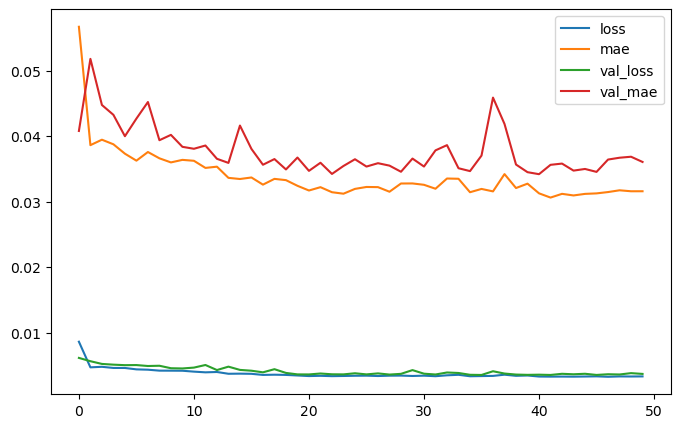

8/8 [==============================] - 1s 33ms/step
R² Score: 0.57


In [11]:
# Loss graph
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

# Predictions
pred = model.predict(x_test).flatten()

# R² Score
r2 = r2_score(y_test, pred)
print(f"R² Score: {r2:.2f}")


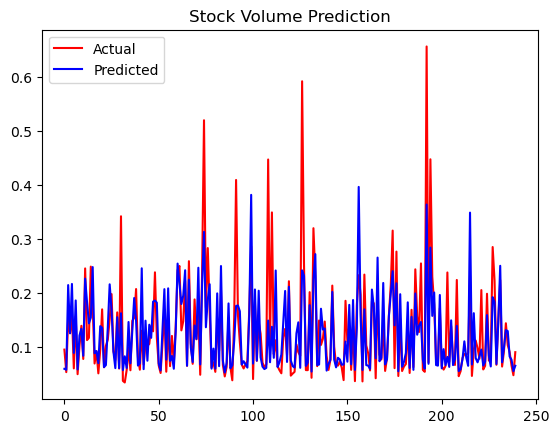

In [14]:
plt.plot(y_test, label='Actual', c='r')
plt.plot(pred, label='Predicted', c='b')
plt.title('Stock Volume Prediction')
plt.legend()
plt.show()
